# Airline Analysis: Gideon Schmickle

In this project, you'll imagine that you work for a travel agency and need to know the ins and outs of airline prices for your clients. You want to make sure that you can find the best deal for your client and help them to understand how airline prices change based on different factors.

You decide to look into your favorite airline. The data include:
- `miles`: miles traveled through the flight
- `passengers`: number of passengers on the flight
- `delay`: take-off delay in minutes
- `inflight_meal`: is there a meal included in the flight?
- `inflight_entertainment`: are there free entertainment systems for each seat?
- `inflight_wifi`: is there complimentary wifi on the flight?
- `day_of_week`: day of the week of the flight
- `weekend`: did this flight take place on a weekend?
- `coach_price`: the average price paid for a coach ticket
- `firstclass_price`: the average price paid for first-class seats
- `hours`: how many hours the flight took
- `redeye`: was this flight a redeye (overnight)?

In this project, you'll explore a dataset for the first time and get to know each of these features. Keep in mind that there's no one right way to address each of these questions. The goal is simply to explore and get to know the data using whatever methods come to mind.

You will be working in this file. Note that there is the file **Airline Analysis_Solution.ipynb** that contains the solution code for this project. We highly recommend that you complete the project on your own without checking the solution, but feel free to take a look if you get stuck or if you want to compare answers when you're done.

In order to get the plots to appear correctly in the notebook, you'll need to show and then clear each plot before creating the next one using the following code:

```py
plt.show() # Show the plot
plt.clf() # Clear the plot
```

Clearing the plot will not erase the plot from view, it will just create a new space for the following graphic.

## Univariate Analysis

1. What do coach ticket prices look like? What are the high and low values? What would be considered the average? Does $500 seem like a good price for a coach ticket?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math
import statsmodels.api as sm

## Read in Data
flight = pd.read_csv("flight.csv")
flight.head()

,miles,passengers,delay,inflight_meal,inflight_entertainment,inflight_wifi,day_of_week,redeye,weekend,coach_price,firstclass_price,hours
0,792,172,0,No,Yes,Yes,Sunday,Yes,Yes,338.820,1571.02,1
1,3163,214,0,No,Yes,Yes,Sunday,No,Yes,472.655,1663.70,6
2,1832,212,0,No,Yes,No,Friday,No,Yes,351.960,1429.86,3
3,925,213,0,No,Yes,Yes,Saturday,No,Yes,387.835,1558.76,2
4,967,217,0,Yes,Yes,Yes,Monday,No,No,374.735,1245.58,2


In [2]:
flight.describe(include="all")

,miles,passengers,delay,inflight_meal,inflight_entertainment,inflight_wifi,day_of_week,redeye,weekend,coach_price,firstclass_price,hours
count,129780.000000,129780.000000,129780.000000,129780,129780,129780,129780,129780,129780,129780.000000,129780.000000,129780.000000
unique,NaN,NaN,NaN,2,2,2,7,2,2,NaN,NaN,NaN
top,NaN,NaN,NaN,No,Yes,Yes,Saturday,No,Yes,NaN,NaN,NaN
freq,NaN,NaN,NaN,90813,104028,116766,33736,123334,84643,NaN,NaN,NaN
mean,2006.224696,207.723155,13.162845,NaN,NaN,NaN,NaN,NaN,NaN,376.585253,1454.931785,3.631214
std,943.034768,12.776363,41.941680,NaN,NaN,NaN,NaN,NaN,NaN,67.744274,162.590434,1.739118
min,12.000000,135.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,44.415000,939.100000,1.000000
25%,1343.000000,204.000000,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,331.445000,1302.200000,2.000000
50%,1986.000000,210.000000,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,380.560000,1503.840000,4.000000
75%,2468.000000,215.000000,13.000000,NaN,NaN,NaN,NaN,NaN,NaN,426.676250,1582.370000,4.000000


In [3]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129780 entries, 0 to 129779
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   miles                   129780 non-null  int64  
 1   passengers              129780 non-null  int64  
 2   delay                   129780 non-null  int64  
 3   inflight_meal           129780 non-null  object 
 4   inflight_entertainment  129780 non-null  object 
 5   inflight_wifi           129780 non-null  object 
 6   day_of_week             129780 non-null  object 
 7   redeye                  129780 non-null  object 
 8   weekend                 129780 non-null  object 
 9   coach_price             129780 non-null  float64
 10  firstclass_price        129780 non-null  float64
 11  hours                   129780 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 11.9+ MB


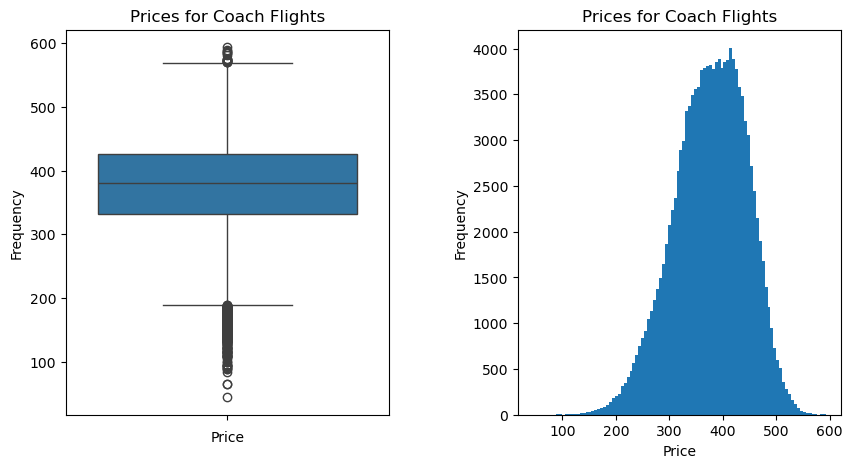

<Figure size 640x480 with 0 Axes>

In [4]:
# task 1

# create subplot
plt.figure(figsize=(10,5))
plt.subplot(1,2,2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)


# create histogram of coach_price
plt.hist(flight.coach_price, bins=100)
plt.subplot(1,2,1)

# add titles and labels
plt.title("Prices for Coach Flights")
plt.xlabel("Price")
plt.ylabel("Frequency")

# create boxplot of coach_price
sns.boxplot(flight.coach_price)
plt.subplot(1,2,2)

# add titles and labels
plt.title("Prices for Coach Flights")
plt.xlabel("Price")
plt.ylabel("Frequency")

# show plot
plt.show()
plt.clf()

In [5]:
# find the minimum and maximum of the coach prices
print(f"The minimum coach price is ${round(flight.coach_price.min(),2)}, and the maximum coach price is ${round(flight.coach_price.max(),2)}.")

The minimum coach price is $44.41, and the maximum coach price is $593.63.


In [6]:
# find the average of the prices
print(f"The average coach price is ${round(flight.coach_price.mean(),2)}.")

The average coach price is $376.59.


In [7]:
# find the median price
print(f"The median coach price is ${round(flight.coach_price.median(),2)}.")

The median coach price is $380.56.


# Graph Interpretation

It seems more common for people to pay between \\$325 and \\$425 for a ticket. With this in mind, \\$500 is on the pricier end of tickets. I would not recommend buying a ticket for that price

2. Now visualize the coach ticket prices for flights that are 8 hours long. What are the high, low, and average prices for 8-hour-long flights? Does a $500 dollar ticket seem more reasonable than before?

In [8]:
## Task 2
flights_8 = flight[flight.hours == 8].coach_price
flights_8.reset_index(drop = True, inplace=True)
print(flights_8)

0       416.320
1       474.350
2       407.125
3       432.905
4       406.565
         ...   
2629    372.655
2630    495.390
2631    486.165
2632    406.550
2633    355.510
Name: coach_price, Length: 2634, dtype: float64


In [9]:
flights_8.describe()

count    2634.000000
mean      431.834377
std        64.083280
min       170.770000
25%       390.266250
50%       437.115000
75%       480.043750
max       593.635000
Name: coach_price, dtype: float64

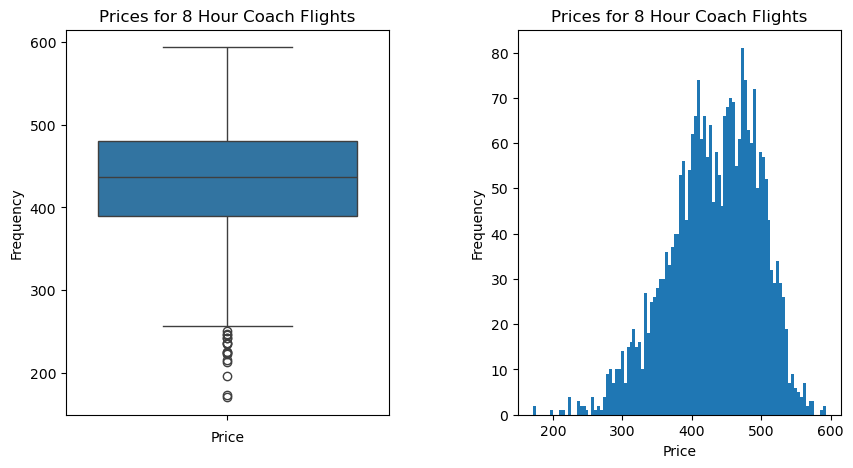

<Figure size 640x480 with 0 Axes>

In [10]:
# create subplot
fig = plt.figure(figsize=(10,5))
plt.subplot(1,2,2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# create histogram of 8 hour coach flight prices
plt.hist(flights_8, bins=100)
plt.subplot(1,2,1)

# add titles and labels
plt.title("Prices for 8 Hour Coach Flights")
plt.xlabel("Price")
plt.ylabel("Frequency")

# create boxplot of 8 hour coach flight prices
sns.boxplot(flights_8)
plt.subplot(1,2,2)

# add titles and labels
plt.title("Prices for 8 Hour Coach Flights")
plt.xlabel("Price")
plt.ylabel("Frequency")

# show plot
plt.show()
plt.clf()

In [11]:
# find the minimum and maximum of the coach prices
print("The minimum coach price for 8 hour flights is ${:.2f}, and the maximum coach price for 8 hour flights is ${:.2f}.".format(flights_8.min(),flights_8.max(),))

The minimum coach price for 8 hour flights is $170.77, and the maximum coach price for 8 hour flights is $593.63.


In [12]:
# find the average of the prices
print("The average coach price is ${:.2f}.".format(flights_8.mean()))

The average coach price is $431.83.


In [13]:
# find the median price
print("The median coach price is ${}.".format(flights_8.median()))

The median coach price is $437.115.


# Graph Interpretation

It seems more common for people to pay between \\$390 and \\$480 for a ticket. With this in mind, \\$500 seems slightly more reasonable. One would have to consider all options before buying.

3. How are flight delay times distributed? Let's say there is a short amount of time between two connecting flights, and a flight delay would put the client at risk of missing their connecting flight. You want to better understand how often there are large delays so you can correctly set up connecting flights. What kinds of delays are typical?

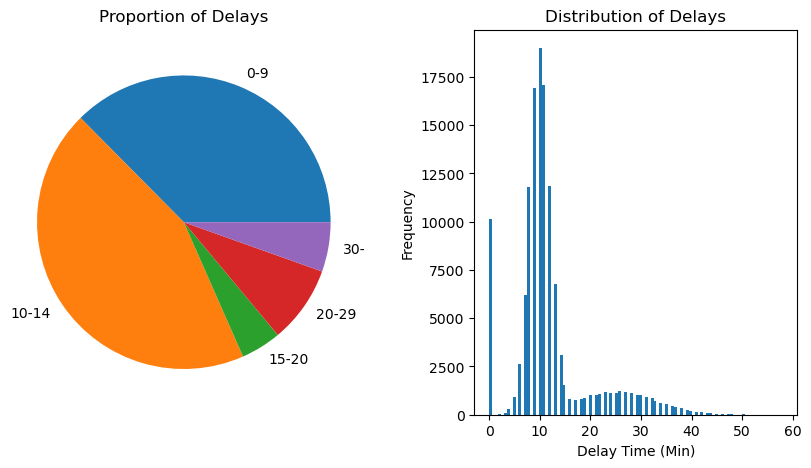

<Figure size 640x480 with 0 Axes>

In [14]:
## Task 3

# create figure and subplots
plt.figure(figsize=(10,5))
plt.subplot(1,2,2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# create histogram
plt.hist(flight[flight.delay <= 60].delay, bins=100)

# give labels and titles to graph
plt.xlabel("Delay Time (Min)")
plt.ylabel("Frequency")
plt.title("Distribution of Delays")
plt.subplot(1,2,1)

# divide for pie graph
delays = [flight[(flight.delay >= 0) & (flight.delay <= 9)].delay.count()]
delays.append(flight[(flight.delay >= 10) & (flight.delay <= 14)].delay.count())
delays.append(flight[(flight.delay >= 15) & (flight.delay <= 20)].delay.count())
delays.append(flight[(flight.delay >= 20) & (flight.delay <= 29)].delay.count())
delays.append(flight[(flight.delay >= 30)].delay.count())

# iterate to find proportions
delays = [delay/flight.delay.count() for delay in delays]

# labels for pie chart
delay_labels = ["0-9", "10-14", "15-20", "20-29", "30-"]

# create pie plot
plt.pie(delays, labels = delay_labels)
plt.axis("equal")
plt.title("Proportion of Delays")
plt.subplot(1,2,2)


# show plot
plt.show()
plt.clf()

# Graph Interpretation

A majority of the delays are between 0-15 minutes. More specifically, it seems that it is pretty normal to expect a delay between 8-15 minutes. A delay longer than 15 minutes should only happen a fourth of the time.

## Bivariate Analysis

4. Create a visualization that shows the relationship between coach and first-class prices. What is the relationship between these two prices? Do flights with higher coach prices always have higher first-class prices as well?

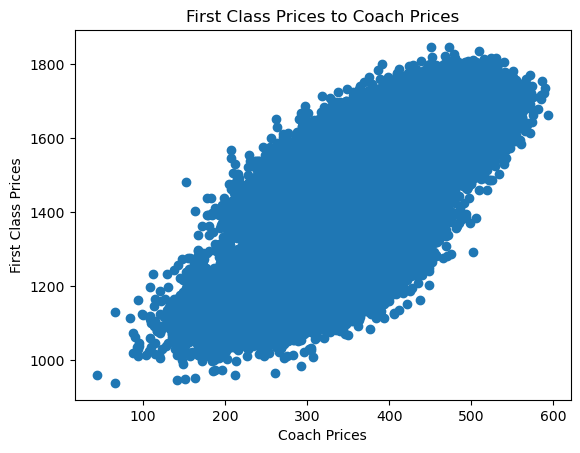

<Figure size 640x480 with 0 Axes>

In [15]:
## Task 4

# create a scatter plot
plt.scatter(x="coach_price", y="firstclass_price", data=flight)
plt.xlabel("Coach Prices")
plt.ylabel("First Class Prices")
plt.title("First Class Prices to Coach Prices")

plt.show()
plt.clf()

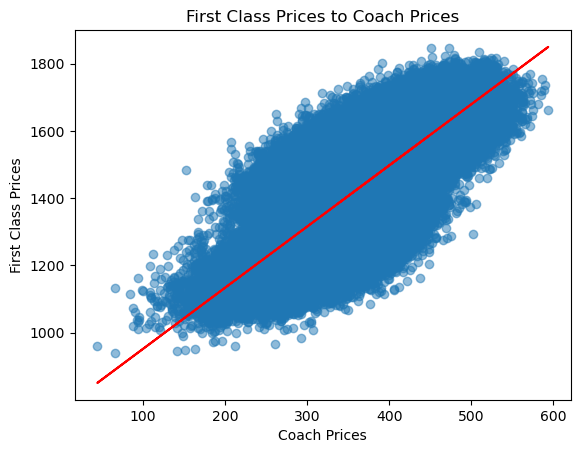

<Figure size 640x480 with 0 Axes>

In [16]:
# create a linear regression model
model = sm.OLS.from_formula("firstclass_price ~ coach_price", data=flight)
results = model.fit()

# plot a scatter plot and the linear regression line
plt.scatter(x="coach_price", y="firstclass_price", data=flight, alpha = 0.5)
plt.plot(flight.coach_price, results.params.iloc[1] * flight.coach_price + results.params.iloc[0], color="red")
plt.xlabel("Coach Prices")
plt.ylabel("First Class Prices")
plt.title("First Class Prices to Coach Prices")

# show plot
plt.show()
plt.clf()

# Graph Interpretation

The two variables seem to have a positive correlation. It does appear that when coach prices are higher, the first class prices will also be higher.

5. What is the relationship between coach prices and inflight features &mdash; inflight meal, inflight entertainment, and inflight WiFi? Which features are associated with the highest increase in price?

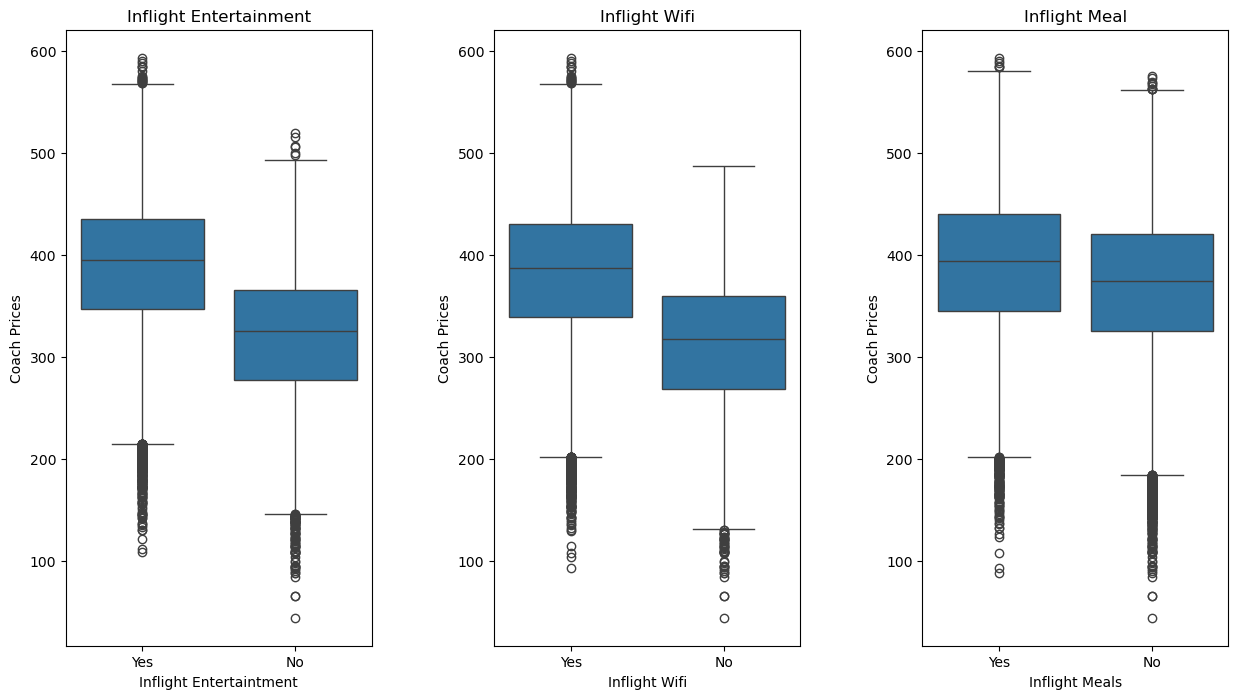

<Figure size 640x480 with 0 Axes>

In [17]:
## Task 5

# create figure and subplots
plt.figure(figsize=(15,8))
plt.subplot(1,3,3)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# create boxplot of inflight meals
sns.boxplot(x=flight.inflight_meal, y=flight.coach_price, order=["Yes", "No"])
plt.ylabel("Coach Prices")
plt.xlabel("Inflight Meals")
plt.title("Inflight Meal")
plt.subplot(1,3,1)

# create boxplot of inflight wifi
sns.boxplot(x=flight.inflight_entertainment, y=flight.coach_price, order=["Yes", "No"])
plt.ylabel("Coach Prices")
plt.xlabel("Inflight Entertaintment")
plt.title("Inflight Entertainment")
plt.subplot(1,3,2)

# create boxplot of inflight entertainment
sns.boxplot(x=flight.inflight_wifi, y=flight.coach_price, order=["Yes", "No"])
plt.ylabel("Coach Prices")
plt.xlabel("Inflight Wifi")
plt.title("Inflight Wifi")
plt.subplot(1,3,3)

# show plot
plt.show()
plt.clf()


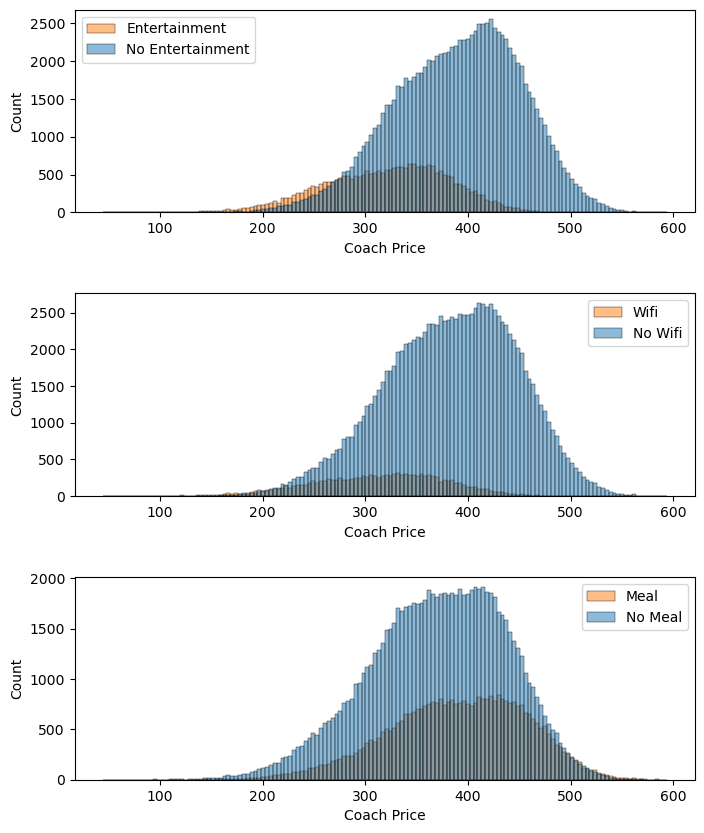

<Figure size 640x480 with 0 Axes>

In [18]:
# create figure and subplots
plt.figure(figsize=(8,10))
plt.subplot(3,1,3)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# create histogram of inflight meals
sns.histplot(flight, x= "coach_price", hue = flight.inflight_meal, alpha=.5)
plt.xlabel("Coach Price")
plt.legend(["Meal", "No Meal"])
plt.subplot(3,1,1)

# create histogram of inflight entertainment
sns.histplot(flight, x= "coach_price", hue = flight.inflight_entertainment, alpha=.5)
plt.xlabel("Coach Price")
plt.legend(["Entertainment", "No Entertainment"])
plt.subplot(3,1,2)

# create histogram of inflight wifi
sns.histplot(flight, x= "coach_price", hue = flight.inflight_wifi, alpha=.5)
plt.xlabel("Coach Price")
plt.legend(["Wifi", "No Wifi"])
plt.subplot(3,1,3)

# show plots
plt.show()
plt.clf()

# Graph Interpretaion

When there is an included feature, the price of the coach flight goes up. If there is inflight wifi or entertainment, the price significantly goes up, whereas the presence of inflight meals only increases the price marginally. The greatest increase in price occurs with inflight entertainment. Without entertainment, the median price is \\$330, wheras the presence of entertainment increases the median to \\$400.

6. How does the number of passengers change in relation to the length of flights?

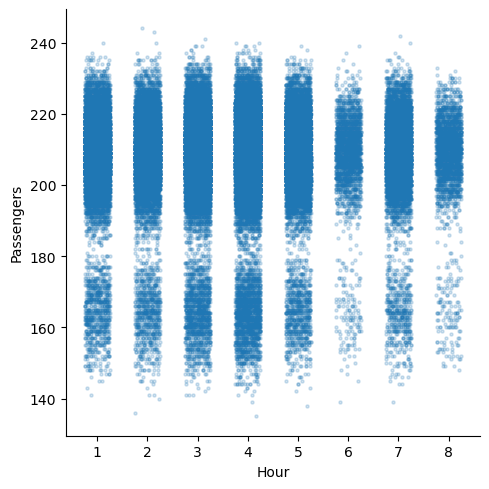

<Figure size 640x480 with 0 Axes>

In [25]:
## Task 6
# create lmplot to find trends
sns.lmplot(x='hours', y='passengers', data = flight, x_jitter = 0.25, scatter_kws={"s": 5, "alpha":0.2}, fit_reg = False)
plt.xlabel("Hour")
plt.ylabel("Passengers")
plt.show()
plt.clf()


# Graph Interpretation

It seems there are far fewer passengers for the 6th and 8th hours. Additionally, there seems to be fewer instances of there being 180 passengers.

## Multivariate Analysis

7. Visualize the relationship between coach and first-class prices on weekends compared to weekdays.

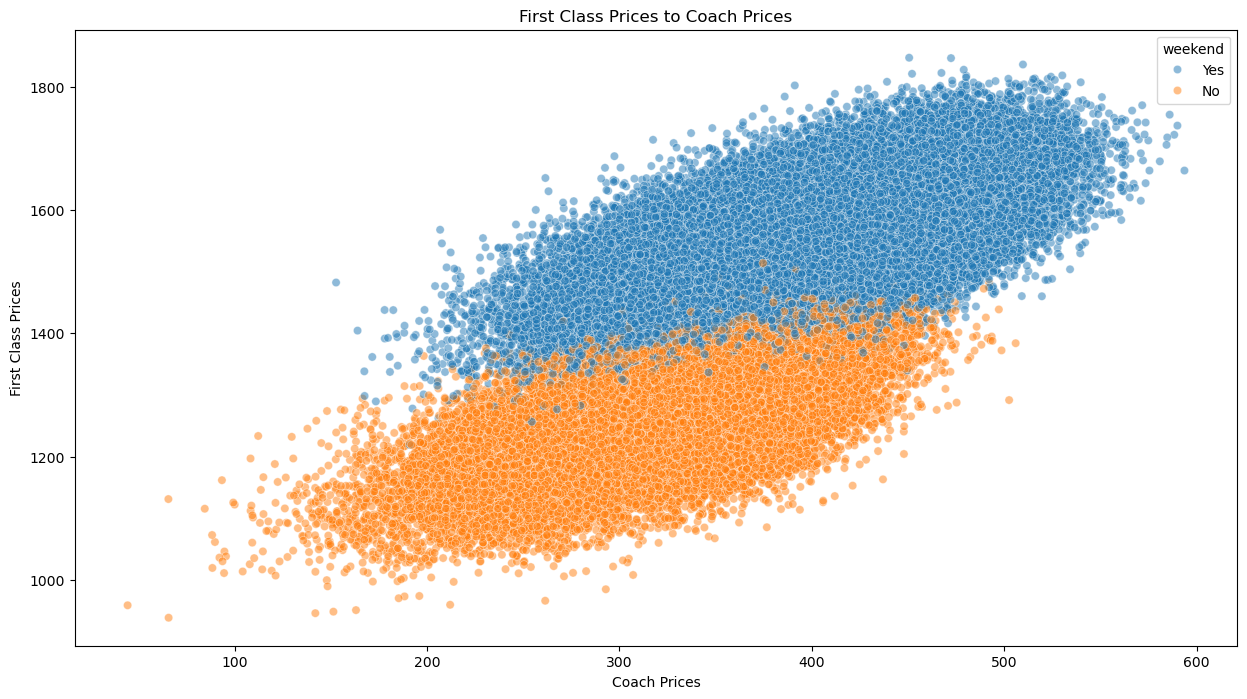

<Figure size 640x480 with 0 Axes>

In [20]:
## Task 7
plt.figure(figsize = (15, 8))

# create scatterplot of coach data
sns.scatterplot(x="coach_price", y="firstclass_price", hue="weekend", data=flight, alpha=0.5)
plt.xlabel("Coach Prices")
plt.ylabel("First Class Prices")
plt.title("First Class Prices to Coach Prices")

# show plot
plt.show()
plt.clf()

# Graph Interpretation

On average, it seems that buying a ticket on the weekend is more expensive than buying a ticket on a weekday. Also, one might get a better deal on a first class ticket if they buy it during the week rather than the weekend. On the flip side, the price differential between coach prices and first class prices is larger during the weekend.

8. How do coach prices differ for redeyes and non-redeyes on each day of the week?

In [21]:
days_of_week = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

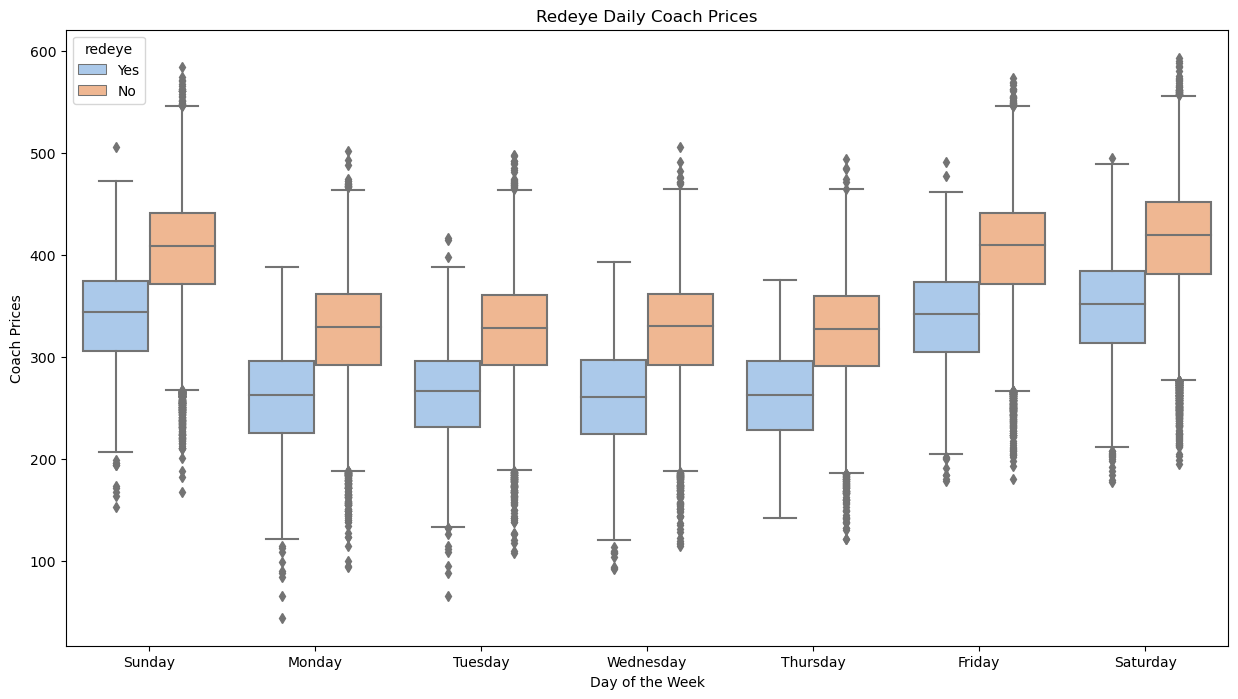

<Figure size 640x480 with 0 Axes>

In [22]:
## Task 8
plt.figure(figsize = (15, 8))

# create boxplot of daily coach prices  
sns.boxplot(x = "day_of_week", y = "coach_price", hue = "redeye", palette = "pastel", data = flight, order=days_of_week)
plt.xlabel("Day of the Week")
plt.ylabel("Coach Prices")
plt.title("Redeye Daily Coach Prices")
plt.show()
plt.clf()

# Graph Interpretation

If the flight is a redeye, the coach prices are much cheaper. This holds true for all days of the week. In this graph, we can also see that prices during the week are much less than those during the weekend.